# Dog Breed Classification

## Collecting Data

In [3]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
# Downloading the datsets
! kaggle datasets download catherinehorng/dogbreedidfromcomp

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 691M/691M [00:35<00:00, 22.6MB/s]
100% 691M/691M [00:35<00:00, 20.5MB/s]


In [4]:
# unzipping the data
import zipfile
data=zipfile.ZipFile('/content/dogbreedidfromcomp.zip')
data.extractall()
data.close()

## Preparing data

In [5]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/test

In [6]:
import pandas as pd
import numpy as np
labels=pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
labels['breed'].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [8]:
class_names=['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'border_collie', 'entlebucher', 'collie', 'malamute',
       'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malinois',
       'komondor', 'airedale', 'leonberg', 'mexican_hairless',
       'bull_mastiff', 'bernese_mountain_dog',
       'american_staffordshire_terrier', 'lhasa', 'cardigan',
       'italian_greyhound', 'clumber', 'scotch_terrier', 'afghan_hound',
       'old_english_sheepdog', 'saint_bernard', 'miniature_pinscher',
       'eskimo_dog', 'irish_wolfhound', 'brabancon_griffon',
       'toy_terrier', 'chow', 'flat-coated_retriever', 'norwich_terrier',
       'soft-coated_wheaten_terrier', 'staffordshire_bullterrier',
       'english_foxhound', 'gordon_setter', 'siberian_husky',
       'newfoundland', 'briard', 'chesapeake_bay_retriever',
       'dandie_dinmont', 'great_pyrenees', 'beagle', 'vizsla',
       'west_highland_white_terrier', 'kerry_blue_terrier', 'whippet',
       'sealyham_terrier', 'standard_poodle', 'keeshond',
       'japanese_spaniel', 'miniature_poodle', 'pomeranian',
       'curly-coated_retriever', 'yorkshire_terrier', 'pembroke',
       'great_dane', 'blenheim_spaniel', 'silky_terrier',
       'sussex_spaniel', 'german_short-haired_pointer', 'french_bulldog',
       'bouvier_des_flandres', 'tibetan_mastiff', 'english_springer',
       'cocker_spaniel', 'rottweiler']
len(class_names)

120

In [9]:
import os
for classes in class_names:
  os.mkdir(os.path.join('/content/dataset/train',classes))
  os.mkdir(os.path.join('/content/dataset/test',classes))

In [10]:
labels['path']=labels['id']+'.jpg,'+labels['breed']
labels.head()

,id,breed,path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,"000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull"
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,"001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo"
2,001cdf01b096e06d78e9e5112d419397,pekinese,"001cdf01b096e06d78e9e5112d419397.jpg,pekinese"
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,"00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick"
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,"0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_re..."


In [11]:
# Creating a function which moves image to the folder
import shutil
def preprocess_train(path):
  arr=path.split(',')
  src_path=os.path.join('/content/train',arr[0])
  dest_path=os.path.join('/content/dataset/train',arr[1],arr[0])
  shutil.copy(src_path, dest_path)
  print(f'{arr[0]} is copied')

def preprocess_test(path):
  arr=path.split(',')
  src_path=os.path.join('/content/train',arr[0])
  dest_path=os.path.join('/content/dataset/test',arr[1],arr[0])
  shutil.copy(src_path, dest_path)
  print(f'{arr[0]} is copied')


In [12]:
labels.shape

(10222, 3)

In [13]:
from sklearn.model_selection import train_test_split
x=labels.drop(columns=['breed'])
y=labels['breed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train.head()

,id,path
4946,7c58e4aeff32d7ed5e195d6d6c9e4e5d,"7c58e4aeff32d7ed5e195d6d6c9e4e5d.jpg,whippet"
10166,fe8d52ab96ff238ea7d234b508010ece,"fe8d52ab96ff238ea7d234b508010ece.jpg,boxer"
10005,fb0568b6c25ef5bc9dded95154b1cfc9,"fb0568b6c25ef5bc9dded95154b1cfc9.jpg,soft-coat..."
4033,645c27a9ac90d16476106d25db5c18ba,"645c27a9ac90d16476106d25db5c18ba.jpg,vizsla"
1135,1c32819dd77f0ae25c700670d4d054dc,"1c32819dd77f0ae25c700670d4d054dc.jpg,mexican_h..."


In [14]:
x_test.head()

,id,path
3121,4d1b34626edc7dffb8680d8981f0c9d0,"4d1b34626edc7dffb8680d8981f0c9d0.jpg,norwegian..."
8351,d1676f45ee40b1c585ddc56b2a63c402,"d1676f45ee40b1c585ddc56b2a63c402.jpg,lakeland_..."
5393,8815b374db13f9992beb2491dd70f9c0,"8815b374db13f9992beb2491dd70f9c0.jpg,staffords..."
1083,1ad70c17e5e38db454ec75b711ce73ad,"1ad70c17e5e38db454ec75b711ce73ad.jpg,lakeland_..."
2606,40c3e0d2677f42bad549ed337dbb9d50,"40c3e0d2677f42bad549ed337dbb9d50.jpg,kuvasz"


In [15]:
x_train.shape,x_test.shape

((8177, 2), (2045, 2))

In [16]:
x_train['path'].apply(preprocess_train)

Streaming output truncated to the last 5000 lines.
adc3d70faa55039ac9fbc49ba68e758a.jpg is copied
80ec00fdfec7ab916f8ccd769f788bcf.jpg is copied
f9be292e5e04c9ff629ead6c17d5d87d.jpg is copied
1f15eac2f69ca88541e591cec1a19a84.jpg is copied
62a94b0c0c0c3ecf7015868f6bd392a2.jpg is copied
430ffbd213e1e22c4966992a9178a51d.jpg is copied
f589e77c9b0facc8ece5f07e3c04fc46.jpg is copied
0811e959c0fa3b1c7af6be4f645a9464.jpg is copied
53fc9ac8e5f21cd52297f44af13ba52d.jpg is copied
6e5352cce31db68901e5887b12bc9f38.jpg is copied
ef71aaad573e1e289ec9ce92d844f96a.jpg is copied
21b3006afebd75664f31220e2d15e9c4.jpg is copied
bd6a14ec09f86f3fef46f9433db8c445.jpg is copied
a234febaeeba77417fd731d9c5d3a692.jpg is copied
425f6665a1616c4819d20580d09d5e8b.jpg is copied
e681969d4b5b730e9c93ce5e9d9ec9ff.jpg is copied
df464ebe3f311744241cb3d9258a5000.jpg is copied
76fd190c3cba9f9fcee27b206a0ab886.jpg is copied
8b9bb5dbe62e19115abfe6e13590c148.jpg is copied
4c92d3e3899d68ba9be2165e646f6024.jpg is copied
4f2d37638

4946     None
10166    None
10005    None
4033     None
1135     None
         ... 
8499     None
2064     None
7985     None
2303     None
3392     None
Name: path, Length: 8177, dtype: object

In [17]:
x_test['path'].apply(preprocess_test)

4d1b34626edc7dffb8680d8981f0c9d0.jpg is copied
d1676f45ee40b1c585ddc56b2a63c402.jpg is copied
8815b374db13f9992beb2491dd70f9c0.jpg is copied
1ad70c17e5e38db454ec75b711ce73ad.jpg is copied
40c3e0d2677f42bad549ed337dbb9d50.jpg is copied
98653befb4ff74e23ee1a0a9f2a91df2.jpg is copied
8fac9aa474ecefc9b60dbd185f6450d8.jpg is copied
330a44b4ddcd32f30fc5213dc8839318.jpg is copied
8f1e25e2485ecbce36b765b5a992549e.jpg is copied
4a5d7198332eb69e4414aa803126a7ef.jpg is copied
031d3353588a81b42bcae74ff19571b0.jpg is copied
d10569ff8fb93c2ad2636f2e1e7e9d72.jpg is copied
69e4b2d1647eb59844434146b29096a3.jpg is copied
833adc79c13a4c2d232c3395ce946ba9.jpg is copied
b92326736c446df97a64932c02113b47.jpg is copied
9302083c61e3af329ca6143f6fae43e2.jpg is copied
a8de8a9499558fb26f78edbf8a8f1311.jpg is copied
9f66b4be4892cdec9c0d53f646195b04.jpg is copied
40209815012be281287091336c9d6223.jpg is copied
272cfd49116ccb386971218dca0f62ae.jpg is copied
b106df46d6b5fa931d0913dce8a46362.jpg is copied
628b789b1cb9c

3121    None
8351    None
5393    None
1083    None
2606    None
        ... 
1777    None
8237    None
6681    None
4155    None
7170    None
Name: path, Length: 2045, dtype: object

## Importing the dependency

In [18]:
import tensorflow as tf
import tensorflow.keras as kr

In [19]:
train_dir='/content/dataset/train'
test_dir='/content/dataset/test'

In [20]:
from tensorflow.keras.utils import image_dataset_from_directory
IMG_SIZE = (224, 224) # define image size
train_data= image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data = image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 8177 files belonging to 120 classes.
Found 2045 files belonging to 120 classes.


In [22]:
len(train_data.class_names)

120

## Creating Model using Efficientnetb0

In [24]:
base_model=kr.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

16705208/16705208 [==============================] - 2s 0us/step


In [25]:
inputs=kr.layers.Input(shape=(224,224,3), name='input_layer')
x=base_model(inputs)
x=kr.layers.GlobalAveragePooling2D(name='pooling_layer')(x)
outputs=kr.layers.Dense(120,activation='softmax',name='output_layer')(x)
model1=kr.Model(inputs,outputs)
model1.compile(loss='categorical_crossentropy',
               optimizer=kr.optimizers.Adam(),
               metrics=['accuracy'])

In [26]:
his1=model1.fit(train_data,
                epochs=5,
                steps_per_epoch=len(train_data),
                validation_data=test_data,
                validation_steps=len(test_data))

Epoch 1/5
256/256 [==============================] - 42s 105ms/step - loss: 1.7765 - accuracy: 0.6494 - val_loss: 0.7722 - val_accuracy: 0.8181
Epoch 2/5
256/256 [==============================] - 27s 103ms/step - loss: 0.5745 - accuracy: 0.8622 - val_loss: 0.5930 - val_accuracy: 0.8421
Epoch 3/5
256/256 [==============================] - 24s 92ms/step - loss: 0.3983 - accuracy: 0.9039 - val_loss: 0.5439 - val_accuracy: 0.8435
Epoch 4/5
256/256 [==============================] - 23s 89ms/step - loss: 0.3115 - accuracy: 0.9278 - val_loss: 0.5202 - val_accuracy: 0.8474
Epoch 5/5
256/256 [==============================] - 23s 89ms/step - loss: 0.2513 - accuracy: 0.9436 - val_loss: 0.5025 - val_accuracy: 0.8509


In [27]:
# Fine-tuning of efficientnetb0
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

his2=model1.fit(train_data,
                epochs=5,
                steps_per_epoch=len(train_data),
                validation_data=test_data,
                validation_steps=len(test_data))

Epoch 1/5
256/256 [==============================] - 36s 100ms/step - loss: 0.2403 - accuracy: 0.9463 - val_loss: 0.4929 - val_accuracy: 0.8513
Epoch 2/5
256/256 [==============================] - 24s 92ms/step - loss: 0.1957 - accuracy: 0.9563 - val_loss: 0.4905 - val_accuracy: 0.8513
Epoch 3/5
256/256 [==============================] - 24s 92ms/step - loss: 0.1695 - accuracy: 0.9659 - val_loss: 0.4920 - val_accuracy: 0.8518
Epoch 4/5
256/256 [==============================] - 26s 101ms/step - loss: 0.1475 - accuracy: 0.9708 - val_loss: 0.4945 - val_accuracy: 0.8499
Epoch 5/5
256/256 [==============================] - 24s 89ms/step - loss: 0.1285 - accuracy: 0.9762 - val_loss: 0.4977 - val_accuracy: 0.8460


## Creating Model with data augmentation

In [33]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation=kr.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1./255)
], name='data_augmentation')


In [34]:
inputs=kr.layers.Input(shape=(224,224,3), name='input_layer')
x=data_augmentation(inputs)
base_model=kr.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
x=base_model(x)
x=kr.layers.GlobalAveragePooling2D(name='pooling_layer')(x)
outputs=kr.layers.Dense(120,activation='softmax',name='output_layer')(x)
model2=kr.Model(inputs,outputs)
model2.compile(loss='categorical_crossentropy',
               optimizer=kr.optimizers.Adam(),
               metrics=['accuracy'])

In [35]:
his3=model2.fit(train_data,
                epochs=5,
                steps_per_epoch=len(train_data),
                validation_data=test_data,
                validation_steps=len(test_data))

Epoch 1/5
256/256 [==============================] - 51s 168ms/step - loss: 2.4811 - accuracy: 0.4724 - val_loss: 0.9671 - val_accuracy: 0.7878
Epoch 2/5
256/256 [==============================] - 38s 145ms/step - loss: 1.2425 - accuracy: 0.6858 - val_loss: 0.6945 - val_accuracy: 0.8191
Epoch 3/5
256/256 [==============================] - 37s 142ms/step - loss: 0.9986 - accuracy: 0.7324 - val_loss: 0.6161 - val_accuracy: 0.8289
Epoch 4/5
256/256 [==============================] - 36s 139ms/step - loss: 0.8813 - accuracy: 0.7566 - val_loss: 0.5737 - val_accuracy: 0.8328
Epoch 5/5
256/256 [==============================] - 41s 159ms/step - loss: 0.7909 - accuracy: 0.7837 - val_loss: 0.5511 - val_accuracy: 0.8386


In [36]:
# Fine-tuning of efficientnetb0
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

his4=model2.fit(train_data,
                epochs=5,
                steps_per_epoch=len(train_data),
                validation_data=test_data,
                validation_steps=len(test_data))

Epoch 1/5
256/256 [==============================] - 47s 143ms/step - loss: 0.7630 - accuracy: 0.7897 - val_loss: 0.5322 - val_accuracy: 0.8391
Epoch 2/5
256/256 [==============================] - 37s 141ms/step - loss: 0.6956 - accuracy: 0.8075 - val_loss: 0.5339 - val_accuracy: 0.8406
Epoch 3/5
256/256 [==============================] - 37s 143ms/step - loss: 0.6450 - accuracy: 0.8206 - val_loss: 0.5247 - val_accuracy: 0.8406
Epoch 4/5
256/256 [==============================] - 35s 133ms/step - loss: 0.6177 - accuracy: 0.8290 - val_loss: 0.5294 - val_accuracy: 0.8406
Epoch 5/5
256/256 [==============================] - 36s 137ms/step - loss: 0.5849 - accuracy: 0.8375 - val_loss: 0.5328 - val_accuracy: 0.8401


In [37]:
model2.evaluate(test_data)

64/64 [==============================] - 5s 67ms/step - loss: 0.5328 - accuracy: 0.8401


[0.5327857732772827, 0.8400977849960327]

## Plottiing the result

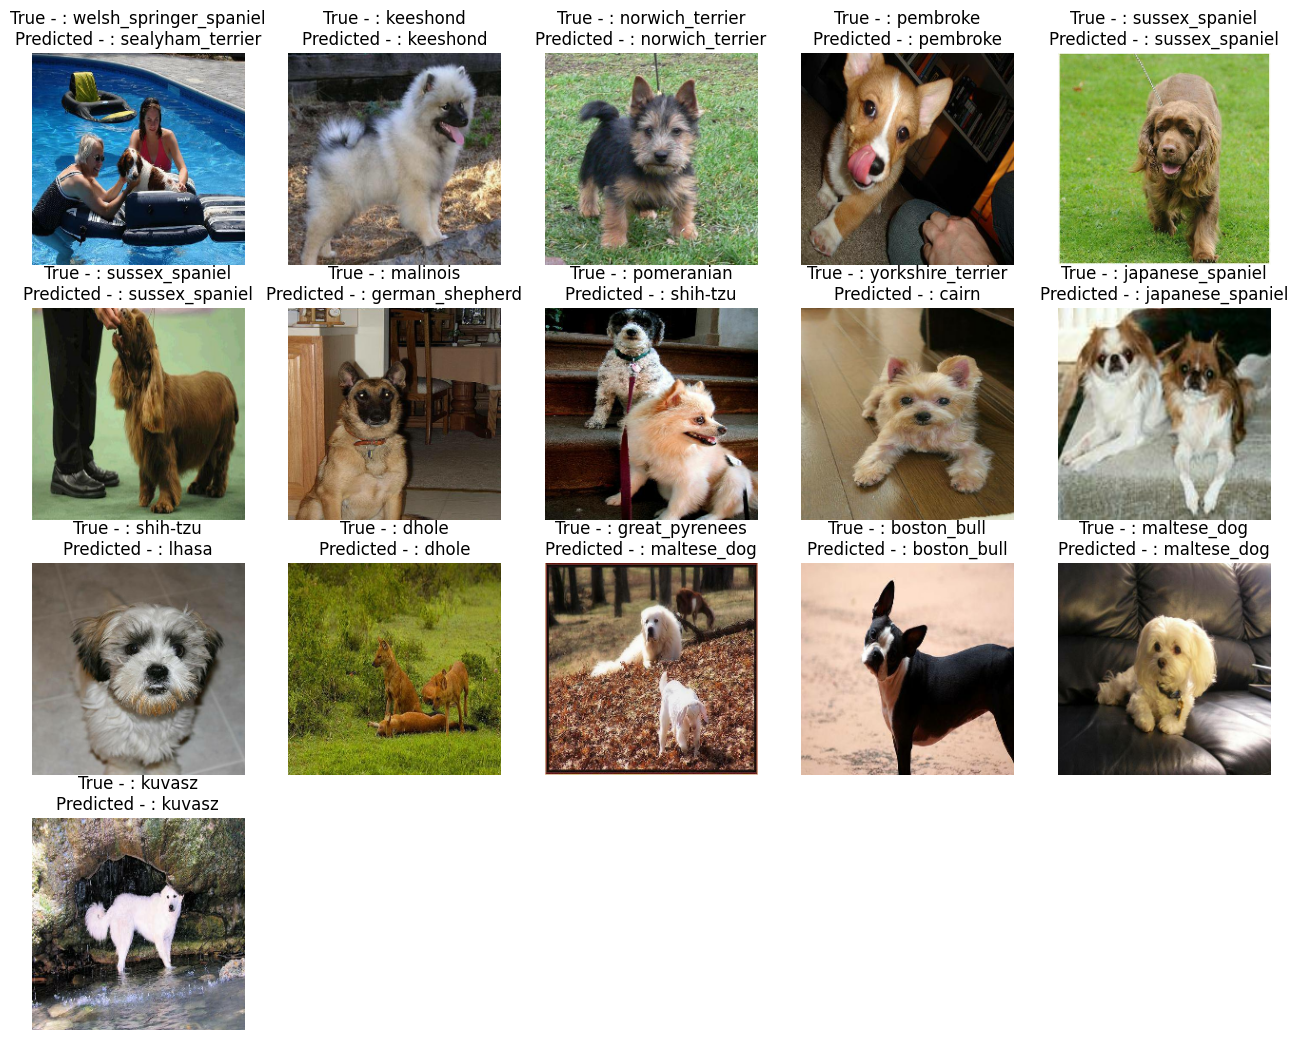

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))

for images, labels in test_data.take(1):
  for i in range(16):
    ax = plt.subplot(5,5, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True - : " + train_data.class_names[tf.argmax(labels[i], axis = -1).numpy()]
              + "\n" + "Predicted - : "
              + train_data.class_names[int(tf.argmax(model2(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
    plt.axis("off")